In [1]:
from multilayernn import * #Import from own library

# MNIST 

## 1. Data Processing and One Hot Encoding

In [2]:
train = pd.read_csv("datasets/mnist_train.csv") #read data from file

#separating labels and pixels
train_labels=np.array(train.loc[:,'label'])
train_data=np.array(train.loc[:,train.columns!='label'])
#The characteristics of MNIST data pixels = 784 samples = 42000 classes = 10

In [3]:
#Convert to onehot encoding
pixels = 784
samples = len(train_labels)
classes = 10
train_data = train_data.T #Transpose the matrix: where each column is a sample
train_label=np.zeros((classes, samples))

for col in range (samples):
    train_label[train_labels[col],col]=1

#Scaling Down of dataset
train_data = train_data/255

## 2. Training of Model

Hypermeters:
1. Tune the right weights as improper weights will cause exploding outputs
2. Tune the learning rate and gamma
3. Tune the number of epoch to be trained

In [4]:
#Create Mulit Layer Network
nodes_per_layer = [784, 500, 200, 80, 10] #nodes in each layer of neural network
mnist_nn = deepNN(nodes_per_layer, learning_rate = 0.3, gamma = 0.7, epoch=10)

training...
Epoch:0 | Cross Entropy Error: 2.3940309278768983 | Accuacy: 10.743333333333334%
Epoch:1 | Cross Entropy Error: 2.2481330481231225 | Accuacy: 19.21%
Epoch:2 | Cross Entropy Error: 2.123812023319786 | Accuacy: 32.538333333333334%
Epoch:3 | Cross Entropy Error: 1.9651326519337888 | Accuacy: 47.16166666666667%
Epoch:4 | Cross Entropy Error: 1.7790435136371927 | Accuacy: 56.074999999999996%
Epoch:5 | Cross Entropy Error: 1.5858467754679488 | Accuacy: 61.78666666666667%
Epoch:6 | Cross Entropy Error: 1.3767362075604808 | Accuacy: 67.72500000000001%
Epoch:7 | Cross Entropy Error: 1.1794484545759225 | Accuacy: 71.49333333333333%
Epoch:8 | Cross Entropy Error: 1.0026884474365318 | Accuacy: 75.99833333333333%
Epoch:9 | Cross Entropy Error: 0.8610428907151668 | Accuacy: 79.35333333333332%


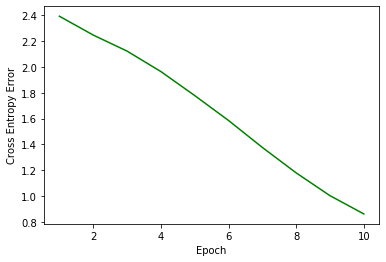

<Figure size 432x288 with 0 Axes>

In [5]:
#Train the network
mnist_nn.train_model(train_data, train_label, train_labels, verbose = True, filename="accuracy/mnist/mnistdata")

## 3. Testing of Model

In [6]:
#data preprocessing
test = pd.read_csv("datasets/mnist_test.csv") #read data from file

#separating labels and pixels
test_labels=np.array(test.loc[:,'label'])
test_data=np.array(test.loc[:,test.columns!='label'])
#The characteristics of MNIST data pixels = 784 samples = 42000 classes = 10

In [7]:
#Convert to onehot encoding
pixels = 784
samples = len(test_labels)
classes = 10
test_data = test_data.T #Transpose the matrix: where each column is a sample
test_label=np.zeros((classes, samples))

for col in range (samples):
    test_label[test_labels[col],col]=1

#Scaling Down of dataset
test_data = test_data/255

In [8]:
test_error, test_accuracy = mnist_nn.test_model( test_data, test_label, test_labels, filename="accuracy/mnist/mnistdata")

Accuracy on Test Data: 81.82000000000001% | Cross Entropy Error: 0.7250626949300704


## Conclusion:
Check accuracy folder for all the error and accuracy data.

<hr>

# Kaggle: Test and Compute Accuracy for Submission
For submission to the Kaggle the kaggle test data needs to be passed through the model.
The following code will generate the "sample_submission.csv" for the Kaggle MNIST.

**Uncomment the Following for Kaggle**

In [9]:
# test_data= pd.read_csv("datasets/kaggle/mnist_test.csv") #This generated cvs file which can be submitted to the Kaggle
# test_data=np.array(test_data) #separating labels and pixels

# #Preprocess data for the model
# test_data = test_data.T #Transpose the matrix: where each column is a sample
# test_data = test_data/255 #scale the data to range 1

# #Test the data for the model
# Y_hat, cache = mnist_nn.forward_propagation(test_data)
# Y_predicted = np.argmax(Y_hat, axis=0)

# #Create submission ready data
# df = pd.DataFrame(Y_predicted, columns = ["Label"]) 
# df.index.name = 'ImageId'
# df.index += 1 
# df.to_csv('kaggle_submission/sample_submission.csv', index = True)